### importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
df.shape

(1599, 12)

#### Checking Missing values

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### no missing values in dataset

#### Checking Duplicates

In [5]:
df.duplicated().sum()

240

#### 240 duplicates in dataset

In [6]:
## drop duplicates
df1 = df.drop_duplicates()

In [7]:
df1.shape

(1359, 12)

#### duplicate data removed

#### Checking data types

In [8]:
df1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Checking the unique values of each column

In [9]:
df1.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

#### Checking statistics of dataset

In [10]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Checking the distribution

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

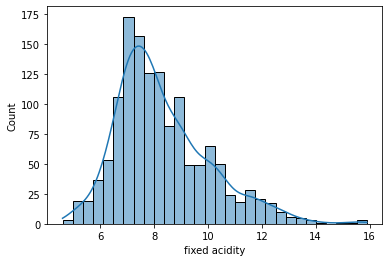

In [11]:
sns.histplot(data=df1,x='fixed acidity', kde=True )

In [12]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

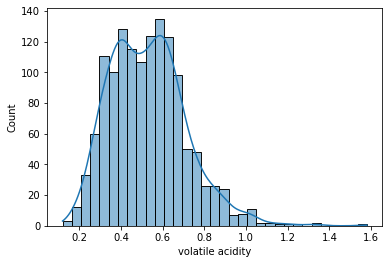

In [13]:
sns.histplot(data=df1,x='volatile acidity', kde=True )

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

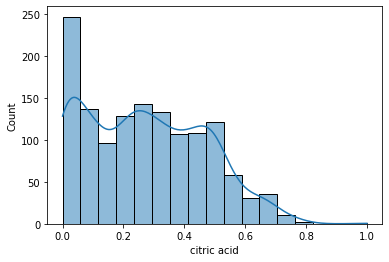

In [14]:
sns.histplot(data=df1,x='citric acid', kde=True )

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

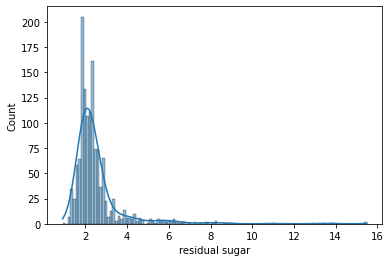

In [15]:
sns.histplot(data=df1,x='residual sugar', kde=True )

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

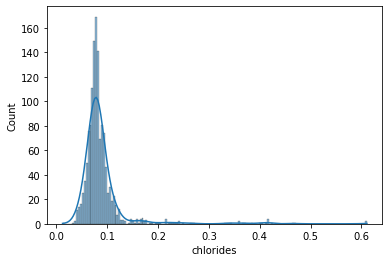

In [16]:
sns.histplot(data=df1,x='chlorides', kde=True )

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

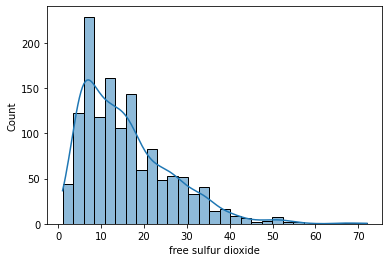

In [17]:
sns.histplot(data=df1,x='free sulfur dioxide', kde=True )

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

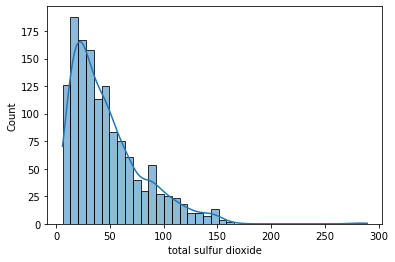

In [18]:
sns.histplot(data=df1,x='total sulfur dioxide', kde=True )

<AxesSubplot:xlabel='density', ylabel='Count'>

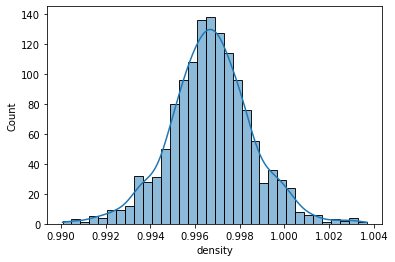

In [19]:
sns.histplot(data=df1,x='density', kde=True )

<AxesSubplot:xlabel='pH', ylabel='Count'>

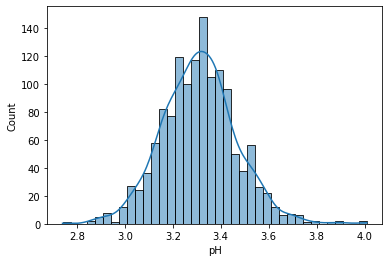

In [20]:
sns.histplot(data=df1,x='pH', kde=True )

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

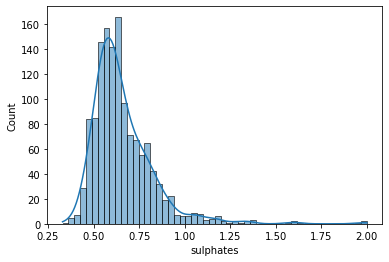

In [21]:
sns.histplot(data=df1,x='sulphates', kde=True )

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

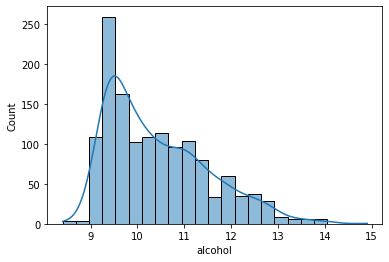

In [22]:
sns.histplot(data=df1,x='alcohol', kde=True )

### Checking Outliers

Text(0.5, 1.0, 'Boxplot')

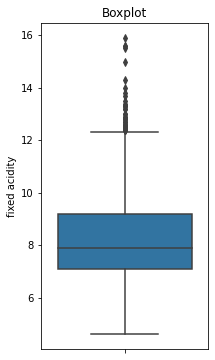

In [23]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['fixed acidity'])
plt.title('Boxplot')

In [24]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary, lower_boundary

In [25]:
upper_boundary, lower_boundary = find_boundaries(df1, 'fixed acidity', 1.5)
upper_boundary, lower_boundary

(12.349999999999998, 3.95)

In [26]:
outliers = np.where(df1['fixed acidity'] > upper_boundary, True, np.where(df1['fixed acidity'] < lower_boundary, True, False))

In [27]:
outliers_df1 = df1.loc[outliers, 'fixed acidity']

#### trimming the outliers

In [28]:
df1_trimed= df1.loc[~outliers, 'fixed acidity']

In [29]:
df1['fixed acidity'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

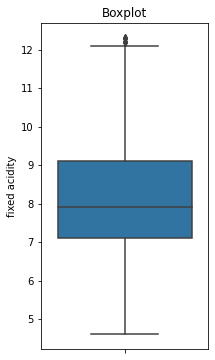

In [30]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['fixed acidity'])
plt.title('Boxplot')

#### see the difference after removing outliers

### Trimming volatile acidity

Text(0.5, 1.0, 'Boxplot')

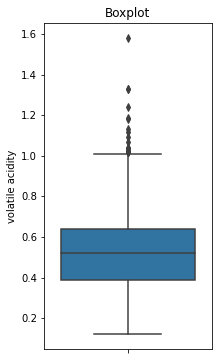

In [31]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['volatile acidity'])
plt.title('Boxplot')

In [32]:
upper_boundary, lower_boundary = find_boundaries(df1, 'volatile acidity', 1.5)
upper_boundary, lower_boundary

(1.0150000000000001, 0.015000000000000013)

In [33]:
outliers = np.where(df1['volatile acidity'] > upper_boundary, True, np.where(df1['volatile acidity'] < lower_boundary, True, False))

In [34]:
outliers_df1 = df1.loc[outliers, 'volatile acidity']

In [35]:
df1_trimed= df1.loc[~outliers, 'volatile acidity']

In [36]:
df1['volatile acidity'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

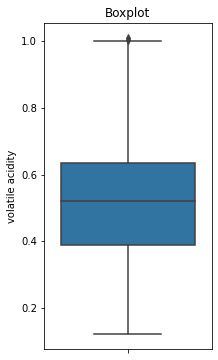

In [48]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['volatile acidity'])
plt.title('Boxplot')

#### see the difference after removing the outliers

### Trimming the outliers from residual sugar

Text(0.5, 1.0, 'Boxplot')

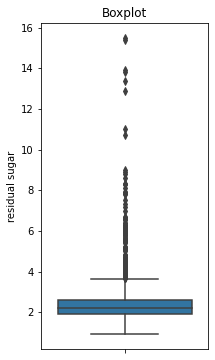

In [37]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['residual sugar'])
plt.title('Boxplot')

In [38]:
upper_boundary, lower_boundary = find_boundaries(df1, 'residual sugar', 1.5)
upper_boundary, lower_boundary

(3.6500000000000004, 0.8499999999999996)

In [39]:
outliers = np.where(df1['residual sugar'] > upper_boundary, True, np.where(df1['residual sugar'] < lower_boundary, True, False))

In [40]:
outliers_df1 = df1.loc[outliers, 'residual sugar']

In [41]:
df1['residual sugar'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

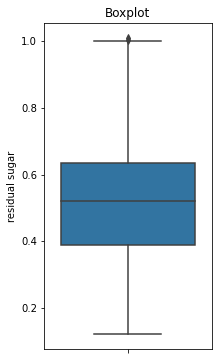

In [56]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['residual sugar'])
plt.title('Boxplot')

#### see the difference after trimming outliers

### Trimming outliers from chlorides

Text(0.5, 1.0, 'Boxplot')

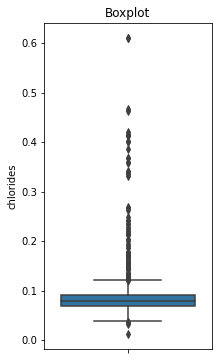

In [42]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['chlorides'])
plt.title('Boxplot')

In [43]:
upper_boundary, lower_boundary = find_boundaries(df1, 'chlorides', 1.5)
upper_boundary, lower_boundary

(0.12249999999999998, 0.03850000000000002)

In [44]:
outliers = np.where(df1['chlorides'] > upper_boundary, True, np.where(df1['chlorides'] < lower_boundary, True, False))

In [45]:
outliers_df1 = df1.loc[outliers, 'chlorides']

In [46]:
df1['chlorides'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

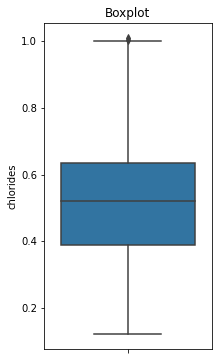

In [47]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['chlorides'])
plt.title('Boxplot')

#### See the difference after trimming the data

### Trimming the free sulfur dioxide 

Text(0.5, 1.0, 'Boxplot')

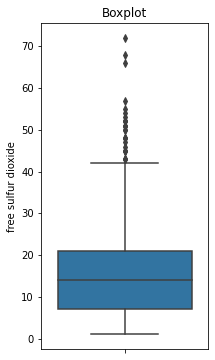

In [48]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['free sulfur dioxide'])
plt.title('Boxplot')

In [49]:
upper_boundary, lower_boundary = find_boundaries(df1, 'free sulfur dioxide', 1.5)
upper_boundary, lower_boundary

(42.0, -14.0)

In [50]:
outliers = np.where(df1['free sulfur dioxide'] > upper_boundary, True, np.where(df1['free sulfur dioxide'] < lower_boundary, True, False))

In [51]:
outliers_df1 = df1.loc[outliers, 'free sulfur dioxide']

In [52]:
df1['free sulfur dioxide'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

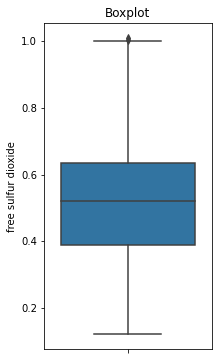

In [53]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['free sulfur dioxide'])
plt.title('Boxplot')

#### see the difference after trimming the data

### Trimming total sulfur dioxide data

Text(0.5, 1.0, 'Boxplot')

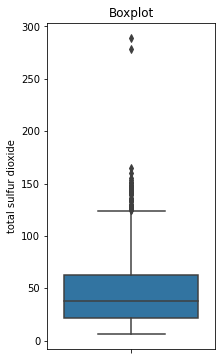

In [54]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['total sulfur dioxide'])
plt.title('Boxplot')

In [55]:
upper_boundary, lower_boundary = find_boundaries(df1, 'total sulfur dioxide', 1.5)
upper_boundary, lower_boundary

(124.5, -39.5)

In [56]:
outliers = np.where(df1['total sulfur dioxide'] > upper_boundary, True, np.where(df1['total sulfur dioxide'] < lower_boundary, True, False))

In [57]:
outliers_df1 = df1.loc[outliers, 'total sulfur dioxide']

In [58]:
df1['total sulfur dioxide'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

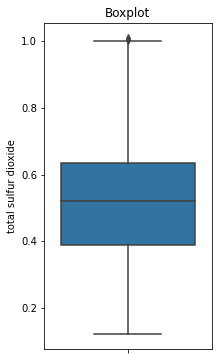

In [59]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['total sulfur dioxide'])
plt.title('Boxplot')

### Trimming the Density dataset

Text(0.5, 1.0, 'Boxplot')

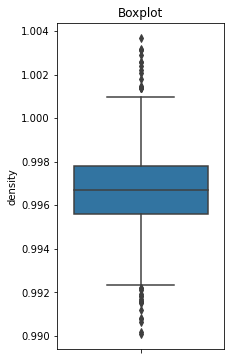

In [60]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['density'])
plt.title('Boxplot')

In [61]:
upper_boundary, lower_boundary = find_boundaries(df1, 'density', 1.5)
upper_boundary, lower_boundary

(1.00115, 0.99227)

In [81]:
outliers = np.where(df1['density'] > upper_boundary, True, np.where(df1['density'] < lower_boundary, True, False))

In [82]:
outliers_df1 = df1.loc[outliers, 'density']

In [83]:
df1['density'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

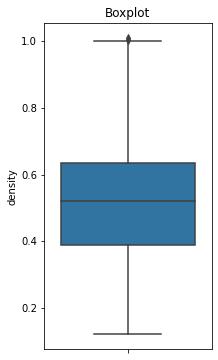

In [84]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['density'])
plt.title('Boxplot')

#### see the difference after trimming the data from pH column

### Trimming pH data

Text(0.5, 1.0, 'Boxplot')

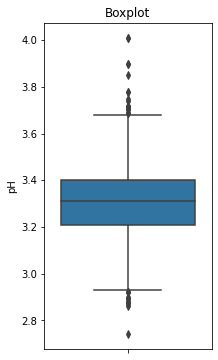

In [62]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['pH'])
plt.title('Boxplot')

In [63]:
upper_boundary, lower_boundary = find_boundaries(df1, 'pH', 1.5)
upper_boundary, lower_boundary

(3.6849999999999996, 2.925)

In [64]:
outliers = np.where(df1['pH'] > upper_boundary, True, np.where(df1['pH'] < lower_boundary, True, False))

In [65]:
outliers_df1 = df1.loc[outliers, 'pH']

In [67]:
df1['pH'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

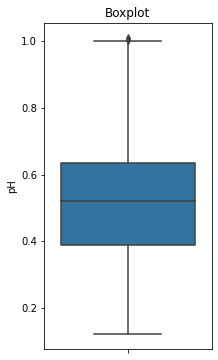

In [68]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['pH'])
plt.title('Boxplot')

### Trimming sulphates columns data 

Text(0.5, 1.0, 'Boxplot')

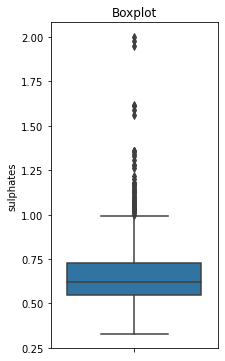

In [69]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['sulphates'])
plt.title('Boxplot')

In [70]:
upper_boundary, lower_boundary = find_boundaries(df1, 'sulphates', 1.5)
upper_boundary, lower_boundary

(0.9999999999999999, 0.28000000000000014)

In [71]:
outliers = np.where(df1['sulphates'] > upper_boundary, True, np.where(df1['sulphates'] < lower_boundary, True, False))

In [72]:
outliers_df1 = df1.loc[outliers, 'sulphates']

In [73]:
df1['sulphates'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

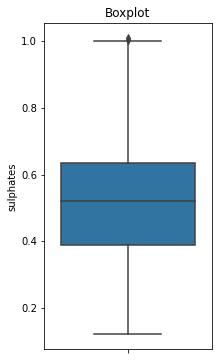

In [74]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['sulphates'])
plt.title('Boxplot')

#### see the difference after trimming the data

### Trimming the alcohol data

Text(0.5, 1.0, 'Boxplot')

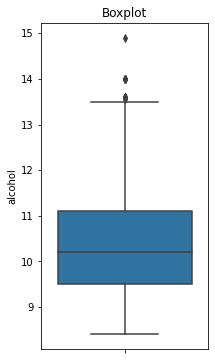

In [75]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['alcohol'])
plt.title('Boxplot')

In [76]:
upper_boundary, lower_boundary = find_boundaries(df1, 'alcohol', 1.5)
upper_boundary, lower_boundary

(13.5, 7.1000000000000005)

In [77]:
outliers = np.where(df1['alcohol'] > upper_boundary, True, np.where(df1['alcohol'] < lower_boundary, True, False))

In [78]:
outliers_df1 = df1.loc[outliers, 'alcohol']

In [79]:
df1['alcohol'] = df1_trimed

Text(0.5, 1.0, 'Boxplot')

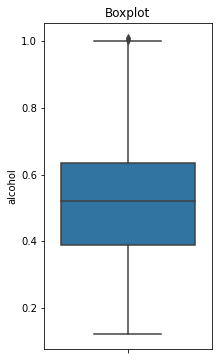

In [80]:
plt.figure(figsize=(3,6))
sns.boxplot(y=df1['alcohol'])
plt.title('Boxplot')

#### see the difference after trimming the data

In [81]:
df1.isnull().sum()

fixed acidity           41
volatile acidity        19
citric acid              0
residual sugar          19
chlorides               19
free sulfur dioxide     19
total sulfur dioxide    19
density                  0
pH                      19
sulphates               19
alcohol                 19
quality                  0
dtype: int64

#### filling the trimming data with mean

In [82]:
df1.fillna(df1.mean().round(1), inplace=True)

In [83]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Model building

In [84]:
X=df1.drop("quality",axis=1)

In [85]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.70,0.70,0.70,0.70,0.9978,0.70,0.70,0.70
1,7.8,0.88,0.00,0.88,0.88,0.88,0.88,0.9968,0.88,0.88,0.88
2,7.8,0.76,0.04,0.76,0.76,0.76,0.76,0.9970,0.76,0.76,0.76
3,11.2,0.28,0.56,0.28,0.28,0.28,0.28,0.9980,0.28,0.28,0.28
5,7.4,0.66,0.00,0.66,0.66,0.66,0.66,0.9978,0.66,0.66,0.66


In [90]:
y=df1["quality"]

In [91]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,7.7,0.620,0.04,0.620,0.620,0.620,0.620,0.99780,0.620,0.620,0.620
1291,8.2,0.635,0.10,0.635,0.635,0.635,0.635,0.99638,0.635,0.635,0.635
1544,8.4,0.370,0.43,0.370,0.370,0.370,0.370,0.99550,0.370,0.370,0.370
593,9.9,0.490,0.58,0.490,0.490,0.490,0.490,1.00040,0.490,0.490,0.490
1261,6.3,0.500,0.00,0.500,0.500,0.500,0.500,0.99437,0.500,0.500,0.500


In [94]:
y_test.head()

55      5
1291    6
1544    7
593     5
1261    4
Name: quality, dtype: int64

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(X_train)##calculate the mean and std dev

StandardScaler()

In [98]:
X_train_tf=scaler.transform(X_train)

In [99]:
X_train_tf

array([[ 1.20576671, -1.53960565,  1.13021198, ..., -1.53960565,
        -1.53960565, -1.53960565],
       [ 1.54846385,  0.71448815, -0.15437648, ...,  0.71448815,
         0.71448815,  0.71448815],
       [ 1.61700328, -0.8085482 ,  0.97606136, ..., -0.8085482 ,
        -0.8085482 , -0.8085482 ],
       ...,
       [-0.91895556, -0.32117657, -0.97651309, ..., -0.32117657,
        -0.32117657, -0.32117657],
       [ 0.52037243, -1.23499838,  0.20530829, ..., -1.23499838,
        -1.23499838, -1.23499838],
       [ 0.65745128, -1.11315547,  0.77052721, ..., -1.11315547,
        -1.11315547, -1.11315547]])

In [100]:
from sklearn.svm import SVC
model=SVC()

In [102]:
model.fit(X_train_tf,y_train)

SVC()

In [103]:
model.score(X_train_tf,y_train)

0.5241758241758242

In [104]:
X_test_tf=scaler.transform(X_test)

In [105]:
y_predict=model.predict(X_test_tf)

In [106]:
y_test

55      5
1291    6
1544    7
593     5
1261    4
       ..
529     5
468     6
371     6
699     6
344     6
Name: quality, Length: 449, dtype: int64

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test,y_predict)

0.5278396436525612

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
model2=LogisticRegression()

In [111]:
model2.fit(X_train_tf,y_train)

LogisticRegression()

In [112]:
y_predict2=model2.predict(X_test_tf)

In [113]:
accuracy_score(y_test,y_predict2)

0.5211581291759465

## improving the accuracy by GridSearch

In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid = GridSearchCV(SVC(),parameters)
grid.fit(X_train,y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [115]:
grid.best_score_

0.48571428571428577

In [116]:
grid.score(X_test,y_test)

0.534521158129176